# Случайные процессы и Метод Монте-Карло

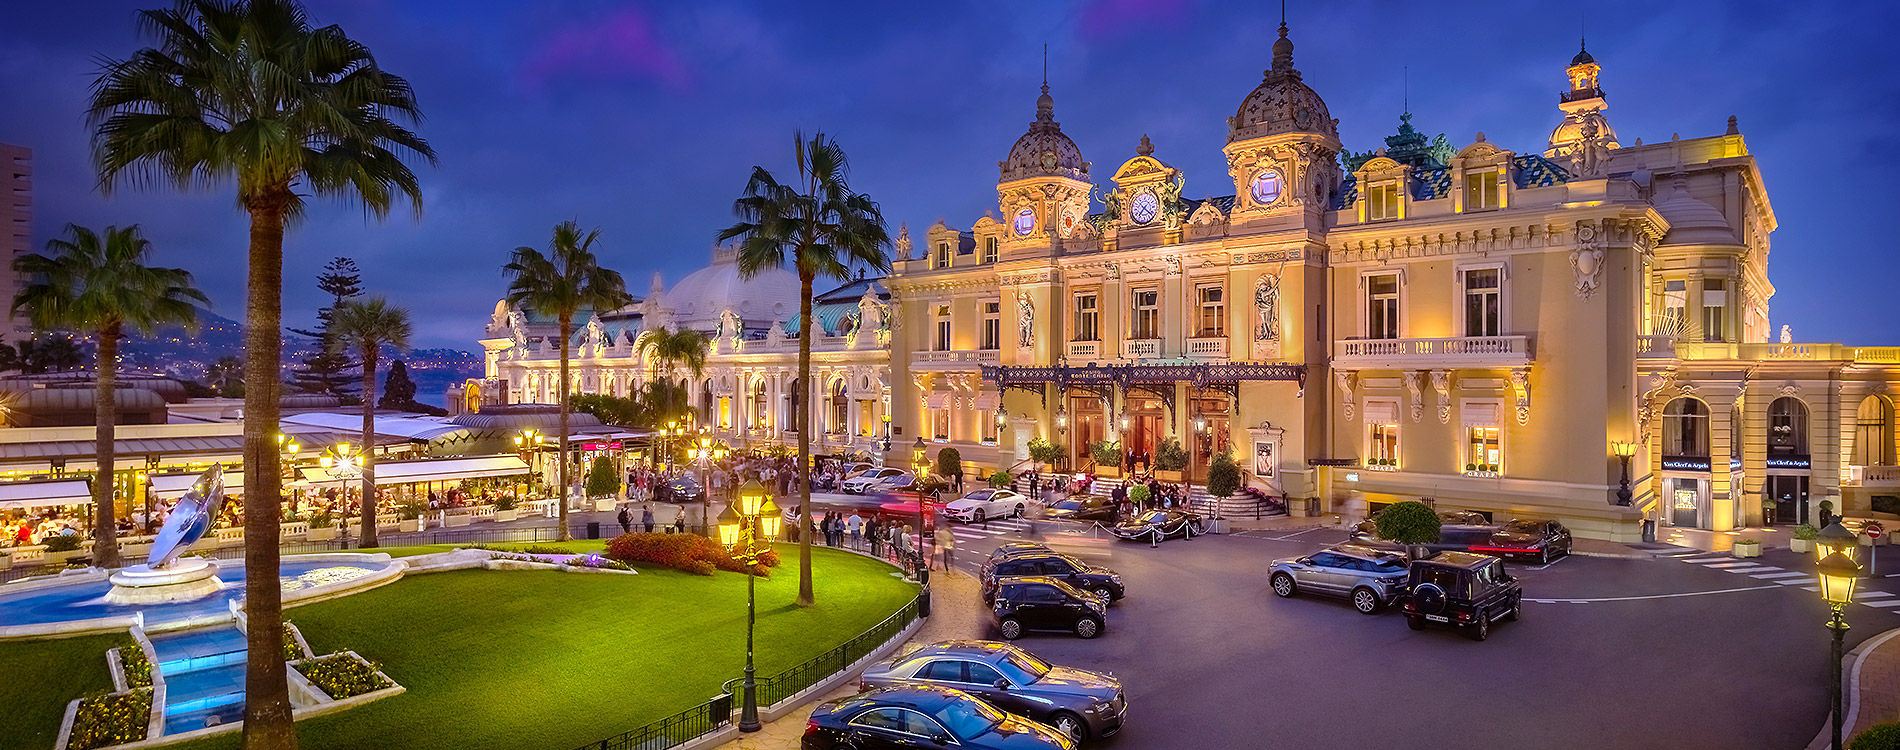

## Теоретическая Основа

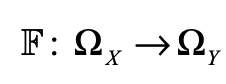

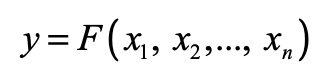

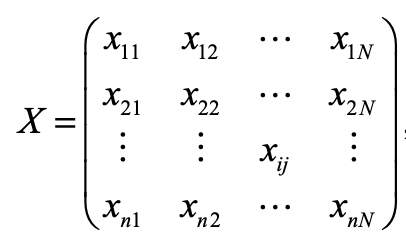

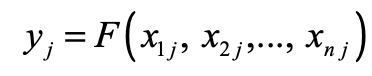

### 1. Создание Модели

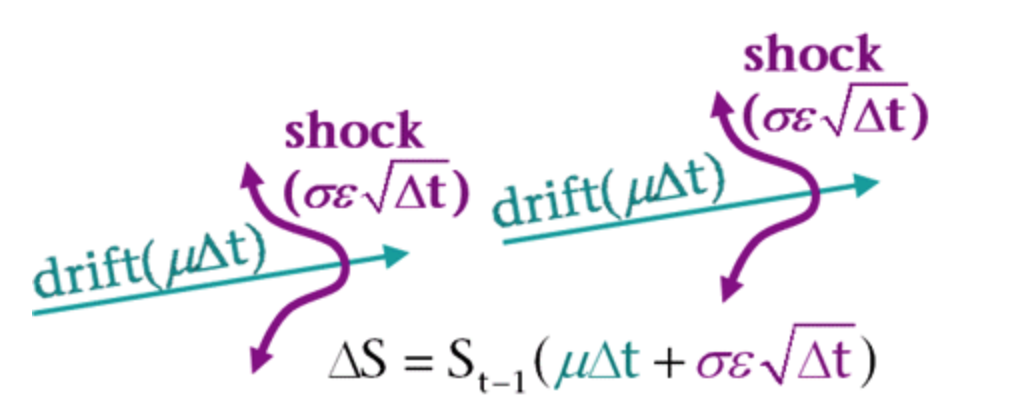

- µ математическое ожидание изменения цены бумаги
- σ волатильность ценной бумаги
- ∆t изменение времени
- ε случайное значение для моделирования волатильности
- S цена акции

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data

In [2]:
s = np.random.normal(0, 1, 100)

In [3]:
s

array([-0.49786063, -0.35528765,  0.1520652 , -1.8026836 ,  0.62867583,
        0.46749619, -0.5556992 , -0.23645243, -1.10642349,  0.21687816,
       -0.1452758 , -0.68987353, -0.1055873 ,  0.52117497,  1.19128827,
       -2.17029363, -0.20929968, -0.31075208,  0.53254151, -1.09017675,
        0.29740818, -0.20163794,  1.0539467 , -0.49608614,  0.01009252,
       -0.55342589,  1.09186504,  1.07266378, -0.30476457,  0.45909317,
        0.50980124, -1.00444779, -1.28551939, -0.54803623, -1.03524466,
       -1.16391607, -0.59059098, -2.59134133, -0.04405652, -1.02181316,
       -0.1573003 , -0.89837351, -1.12173423, -0.15485414,  0.61160779,
        0.86784817,  0.81936673,  0.35208651,  0.48686052,  1.86753132,
        0.63126225, -0.65425583, -0.29430333, -1.61087689,  1.37071989,
       -0.64618156,  0.40652665, -0.08331945, -0.3827676 ,  0.75628178,
        0.21412717, -0.9322078 ,  0.2468046 , -0.08024117,  0.52304134,
       -0.09502155,  0.74853358,  0.05970687, -0.2498838 ,  0.17

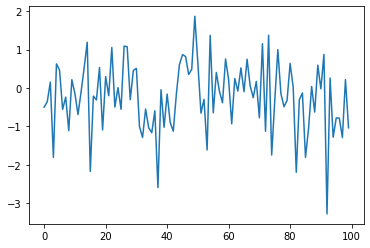

In [4]:
plt.plot(s)
plt.show()

In [5]:
ss=np.random.normal(0, 1, 100)+1

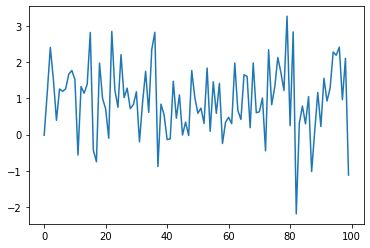

In [6]:
plt.plot(ss)
plt.show()

In [7]:
apple = data.DataReader('AAPL', 'yahoo',start='1/1/2000')

In [17]:
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-28,323.440002,315.630005,316.769989,318.250000,33390200.0,318.250000
2020-05-29,321.149994,316.470001,319.250000,317.940002,38399500.0,317.940002
2020-06-01,322.350006,317.209991,317.750000,321.850006,20197800.0,321.850006
2020-06-02,323.440002,318.929993,320.750000,323.339996,21829600.0,323.339996
2020-06-03,325.000000,322.459991,324.660004,324.209991,5040536.0,324.209991


In [23]:
apple['Adj Close'][-1]

324.2099914550781

In [22]:
time_elapsed = (apple.index[-1] - apple.index[0]).days

In [19]:
365.0 / time_elapsed

0.048947297840954807

In [21]:
price_ratio = (apple['Adj Close'][-1] / apple['Adj Close'][1])
inverse_number_of_years = 365.0 / time_elapsed
cagr = price_ratio ** inverse_number_of_years - 1

In [27]:
inverse_number_of_years - 1

-0.9510527021590451

In [28]:
vol = apple['Adj Close'].pct_change().std()

In [29]:
number_of_trading_days = 252
vol = vol * math.sqrt(number_of_trading_days)

In [30]:
print ("cagr (mean returns) : ", str(round(cagr,4)))
print ("vol (standard deviation of return : )", str(round(vol,4)))

cagr (mean returns) :  0.2542
vol (standard deviation of return : ) 0.4068


### 2. Генерация Случайных Значений

### 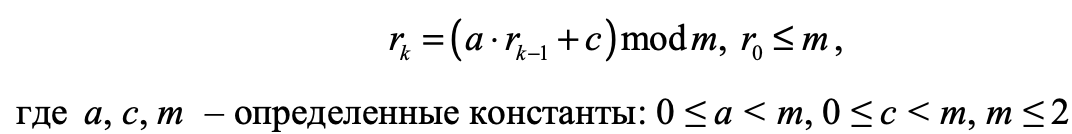

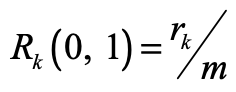

In [31]:
daily_return_percentages = np.random.normal(cagr/number_of_trading_days, vol/math.sqrt(number_of_trading_days),number_of_trading_days)+1

In [32]:
price_series = [apple['Adj Close'][-1]]

for drp in daily_return_percentages:
    price_series.append(price_series[-1] * drp)

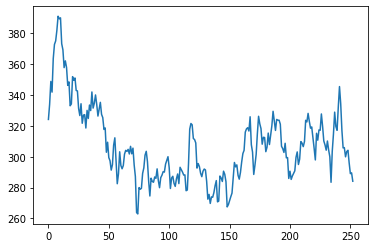

In [33]:
plt.plot(price_series)
plt.show()

### 3. Применение на большом количестве попыток

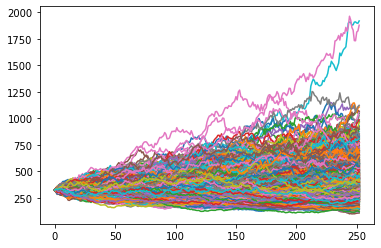

In [34]:
number_of_trials = 1000
for i in range(number_of_trials):
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, vol/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [apple['Adj Close'][-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)
    
    plt.plot(price_series)
plt.show()

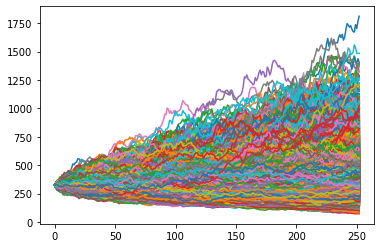

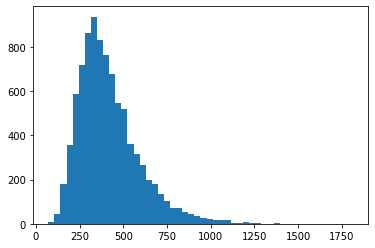

In [35]:
ending_price_points = []
larger_number_of_trials = 9001 
for i in range(larger_number_of_trials):
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, vol/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [apple['Adj Close'][-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)
    
    plt.plot(price_series)
    
    ending_price_points.append(price_series[-1])

plt.show()

plt.hist(ending_price_points,bins=50)
plt.show()

### 4. Анализ Результатов

In [36]:
expected_ending_price_point = round(np.mean(ending_price_points),2)
print("Expected Ending Price Point : ", str(expected_ending_price_point))

Expected Ending Price Point :  417.94


In [37]:
population_mean = (cagr+1) * apple['Adj Close'][-1]
print ("Sample Mean : ", str(expected_ending_price_point))
print ("Population Mean: ", str(round(population_mean,2)));
print ("Percent Difference : ", str(round((population_mean - expected_ending_price_point)/population_mean * 100,2)), "%")

Sample Mean :  417.94
Population Mean:  406.64
Percent Difference :  -2.78 %


In [39]:
top_ten = np.percentile(ending_price_points,100-10)
bottom_ten = np.percentile(ending_price_points,10);
print ("Top 10% : ", str(round(top_ten,2)))
print ("Bottom 10% : ", str(round(bottom_ten,2)))

Top 10% :  649.03
Bottom 10% :  229.92


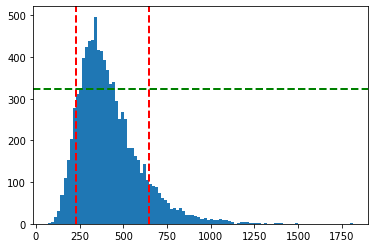

In [40]:
plt.hist(ending_price_points,bins=100)
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
plt.axhline(apple['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)
plt.show()